# AI CLUB DATATHON HACETTEPE UNIVERSITY
## Team Name: **KoMeDi&DaNs&IkIlIsI**
## Team Members:
* **Alperen Demirci**
* **Bora Dere**


## Let's begin with Data Preprocessing

* We will first try to fill the AIL_FRX Data.
* Then we will try to fill the BK_FRX Data.
* Then we will try to fill the CRP_AIL Data.
* Then we will try to fill the ZZC_AIL Data.

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
def convertToNumerical(fileName):
    data = pd.read_csv(fileName)
    data.fillna("0.0", inplace=True)
    data['date'] = data['date'].apply(lambda x: x.strip("\""))
    data['date'] = pd.to_datetime(data['date'], unit='ms')    
    for j in range(1,len(data.columns)):
        i = data.columns[j]
        data[i] = data[i].apply(lambda x: x.strip("\""))
        data[i] = data[i].astype("float")
    return data

In [193]:
ail_frx = convertToNumerical("ail_frx.csv")
bk_frx = convertToNumerical("bk_frx.csv")
crp_ail = convertToNumerical("crp_ail.csv")
zzc_ail = convertToNumerical("zzc_ail.csv")

/var/folders/03/r7dntbdd7d7411fzhxx8p08c0000gn/T/ipykernel_5425/1446659528.py:5: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  data['date'] = pd.to_datetime(data['date'], unit='ms')
/var/folders/03/r7dntbdd7d7411fzhxx8p08c0000gn/T/ipykernel_5425/1446659528.py:5: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  data['date'] = pd.to_datetime(data['date'], unit='ms')
/var/folders/03/r7dntbdd7d7411fzhxx8p08c0000gn/T/ipykernel_5425/1446659528.py:5: FutureWarning: The behavior of 'to_dateti

### Handling the missing values in AIL_FRX Data

In [194]:
ail_frx.describe()

,date,open,high,low,close
count,11322,11322.000000,11322.000000,11322.000000,11322.000000
mean,2013-12-07 03:52:07.975523840,9.942839,9.951800,9.932069,9.167930
min,2012-12-12 20:00:13.824000,6.547919,6.553041,6.538349,0.000000
25%,2013-06-10 19:15:14.560000,8.299913,8.306585,8.289726,8.066795
50%,2013-12-08 06:30:03.520000,8.575274,8.581092,8.570557,8.478118
75%,2014-06-03 22:44:47.232000,12.217313,12.228287,12.203992,12.138825
max,2014-11-30 20:59:10.720000,14.529026,14.728325,14.524129,14.688609
std,NaN,2.356181,2.358256,2.352280,3.490041


In [195]:
def fill_zero_with_formula(stock_data):
    zero_indices = stock_data.index[stock_data['close'] == 0]
    for idx in zero_indices:
        open_value = stock_data.at[idx, 'open']
        high_value = stock_data.at[idx, 'high']
        low_value = stock_data.at[idx, 'low']
        fill_value = (open_value + ((high_value + low_value) / 2)) / 2
        stock_data.at[idx, 'close'] = fill_value
    return stock_data, zero_indices

In [196]:
def fill_moving_average(stock_data, indexes,target,window_size=5):
    for idx in indexes:
        if idx < window_size:
            continue
        stock_data.at[idx, target] = stock_data[target].iloc[idx-window_size:idx].mean()
    return stock_data

In [197]:
def handle_zero_values_close(stock_data):
    stock_data, zero_indices = fill_zero_with_formula(stock_data)
    stock_data = fill_moving_average(stock_data, zero_indices, 'close',8)
    return stock_data

In [198]:
ail_frx = handle_zero_values_close(ail_frx)

### Handling the missing values in BK_FRX Data

In [199]:
bk_frx.describe()

,date,open,high,low,close
count,4886,4886.000000,4886.000000,4886.000000,4886.000000
mean,2013-12-10 13:22:21.685887744,11172.784580,11175.811147,11127.865903,12643.326420
min,2012-12-13 04:00:49.664000,0.000000,0.000000,0.000000,5158.812609
25%,2013-06-13 11:15:39.136000,5957.159674,5955.938370,5940.470435,8040.036630
50%,2013-12-10 08:30:30.912000,11497.416739,11494.951087,11437.273261,11905.804783
75%,2014-06-10 11:45:02.464000,17577.634348,17650.180978,17493.306739,17803.829130
max,2014-11-30 13:00:45.952000,21691.609565,21777.193043,21686.470870,21686.470870
std,NaN,6207.816164,6237.024318,6178.653348,4986.873680


In [200]:
bk_frx.loc[(bk_frx['high'] == 0) & (bk_frx['low'] == 0)]

,date,open,high,low,close
15,2012-12-16 08:58:55.872,5274.836522,0.0,0.0,5268.730000
208,2013-01-10 11:59:10.336,5593.228261,0.0,0.0,5597.836957
267,2013-01-23 10:59:27.360,5476.167391,0.0,0.0,5471.236087
284,2013-01-27 08:00:56.320,5572.765652,0.0,0.0,5547.809565
392,2013-02-12 06:01:03.744,5948.512609,0.0,0.0,5942.890000
...,...,...,...,...,...
4421,2014-09-25 09:00:09.600,0.000000,0.0,0.0,18348.507826
4446,2014-09-30 03:58:54.976,18431.349130,0.0,0.0,18431.349130
4744,2014-11-10 12:00:53.760,21310.839130,0.0,0.0,21181.150435
4748,2014-11-11 06:00:03.328,21178.638696,0.0,0.0,21181.265652


In [201]:
bk_frx.loc[(bk_frx['high'] == 0) & (bk_frx['open'] == 0)]

,date,open,high,low,close
10,2012-12-16 03:59:39.008,0.0,0.0,5218.126522,5218.126522
59,2012-12-20 12:59:50.656,0.0,0.0,5515.203043,5515.203043
255,2013-01-22 08:59:41.952,0.0,0.0,5687.153478,5697.039130
344,2013-02-05 07:59:35.424,0.0,0.0,5498.911304,5501.400000
389,2013-02-11 13:00:53.120,0.0,0.0,5861.016522,5869.381304
...,...,...,...,...,...
4605,2014-10-21 12:58:59.456,0.0,0.0,20377.370870,20377.370870
4662,2014-10-29 10:01:05.280,0.0,0.0,21282.726087,21314.641304
4717,2014-11-06 05:00:51.072,0.0,0.0,21543.693478,21610.450435
4737,2014-11-10 04:59:16.864,0.0,0.0,21275.536522,21275.536522


In [202]:
bk_frx.loc[(bk_frx['low'] == 0) & (bk_frx['open'] == 0)]

,date,open,high,low,close
133,2013-01-01 06:59:03.296,0.0,5810.228696,0.0,5805.827391
142,2013-01-02 05:59:40.800,0.0,5873.828696,0.0,5872.676522
169,2013-01-06 12:59:43.488,0.0,5725.797391,0.0,5720.773913
181,2013-01-08 05:00:31.616,0.0,5620.673043,0.0,5618.000000
246,2013-01-21 09:59:04.448,0.0,5738.310000,0.0,5737.365217
...,...,...,...,...,...
4442,2014-09-29 09:59:45.408,0.0,18548.916957,0.0,18510.203913
4478,2014-10-05 05:59:17.248,0.0,18534.929565,0.0,18502.991304
4759,2014-11-12 07:00:49.792,0.0,21096.373478,0.0,21061.785217
4852,2014-11-25 09:59:13.664,0.0,20910.596957,0.0,20741.918696


In [203]:
bk_frx.loc[(bk_frx['low'] == 0) & (bk_frx['open'] == 0) & (bk_frx['high'] == 0)]

,date,open,high,low,close
443,2013-02-19 06:59:28.896,0.0,0.0,0.0,6131.570000
1778,2013-09-02 04:00:15.872,0.0,0.0,0.0,12463.756522
3537,2014-05-25 05:00:04.992,0.0,0.0,0.0,19230.128261
4056,2014-08-05 03:59:03.168,0.0,0.0,0.0,18561.060870
4355,2014-09-16 12:59:37.344,0.0,0.0,0.0,17079.918261
4421,2014-09-25 09:00:09.600,0.0,0.0,0.0,18348.507826


In [204]:
def fill_high_with_diffmean(stock_data, zero_indices,diff_cols=['low','close'],target='high',sum = True):
    for idx in zero_indices:
        open_value = stock_data.at[idx, diff_cols[0]]
        close_value = stock_data.at[idx, diff_cols[1]]
        if sum:
            fill_value = abs(open_value - close_value) + open_value
        else:
            fill_value = open_value - abs(open_value - close_value)
        stock_data.at[idx, target] = fill_value
    return stock_data, zero_indices

In [205]:
bk_frx, zero_indices = fill_high_with_diffmean(bk_frx, bk_frx.loc[(bk_frx['high'] == 0) & (bk_frx['open'] == 0)].index, ['low','close'],'high')
bk_frx, zero_indices = fill_high_with_diffmean(bk_frx, bk_frx.loc[(bk_frx['open'] == 0) & (bk_frx['low'] == 0)].index, ['close','high'],'low',False)
bk_frx, zero_indices = fill_high_with_diffmean(bk_frx, bk_frx.loc[(bk_frx['low'] == 0) & (bk_frx['high'] == 0)].index, ['open','close'],'low',False)
bk_frx, zero_indices = fill_high_with_diffmean(bk_frx, bk_frx.loc[(bk_frx['high'] == 0)].index, ['open','close'],'high')
bk_frx, zero_indices = fill_high_with_diffmean(bk_frx, bk_frx.loc[(bk_frx['low'] == 0)].index, ['open','close'],'low',False)
bk_frx['mean_high_low'] = (bk_frx['high'] + bk_frx['low']) / 2
bk_frx, zero_indices = fill_high_with_diffmean(bk_frx, bk_frx.loc[(bk_frx['open'] == 0)].index, ['close','mean_high_low'],'open',False)
bk_frx.drop(columns=['mean_high_low'], inplace=True)

In [206]:
bk_frx.describe()

,date,open,high,low,close
count,4886,4886.000000,4886.000000,4886.000000,4886.000000
mean,2013-12-10 13:22:21.685887744,12643.138594,12681.215784,12602.548424,12643.326420
min,2012-12-13 04:00:49.664000,5158.812609,5158.812609,5139.502174,5158.812609
25%,2013-06-13 11:15:39.136000,8037.732283,8060.551087,8011.439674,8040.036630
50%,2013-12-10 08:30:30.912000,11908.869565,11953.527826,11863.911739,11905.804783
75%,2014-06-10 11:45:02.464000,17805.252065,17866.732065,17741.006848,17803.829130
max,2014-11-30 13:00:45.952000,21691.609565,21777.193043,21686.470870,21686.470870
std,NaN,4988.003323,5000.315357,4975.151655,4986.873680


## Time to handle CRP_AIL

In [207]:
crp_ail.describe()

,date,open,high,low,close
count,11055,11055.000000,11055.000000,11055.000000,11055.000000
mean,2013-12-05 14:25:33.719017984,248.776840,270.480730,269.881499,248.606599
min,2012-12-12 18:59:03.808000,0.000000,231.480000,230.698571,0.000000
25%,2013-06-08 23:29:58.784000,252.816429,258.796429,258.245714,252.827857
50%,2013-12-04 07:00:01.664000,271.711429,274.044286,273.580000,271.924286
75%,2014-06-04 00:29:38.688000,282.117143,283.199286,282.564286,282.287857
max,2014-11-30 20:59:10.720000,312.384286,313.597143,311.810000,312.398571
std,NaN,74.659975,17.036087,17.042567,75.102177


In [208]:
crp_ail['mean_high_low'] = (crp_ail['high'] + crp_ail['low']) / 2

In [209]:
crp_ail , zero_indices = fill_high_with_diffmean(crp_ail, crp_ail.loc[(crp_ail['open'] != 0) & (crp_ail['close'] == 0)].index, ['mean_high_low','open'],'close')

In [210]:
crp_ail , zero_indices = fill_high_with_diffmean(crp_ail, crp_ail.loc[(crp_ail['open'] == 0) & (crp_ail['close'] != 0)].index, ['mean_high_low','close'],'open',False)

In [211]:
indexes = crp_ail.loc[(crp_ail['open'] == 0) & (crp_ail['close'] == 0)].index

for idx in indexes:
    crp_ail.at[idx, 'open'] = crp_ail.at[idx, 'mean_high_low']
    crp_ail.at[idx, 'close'] = crp_ail.at[idx, 'mean_high_low']

In [212]:
crp_ail.drop(columns=['mean_high_low'], inplace=True)

In [213]:
crp_ail.describe()

,date,open,high,low,close
count,11055,11055.000000,11055.000000,11055.000000,11055.000000
mean,2013-12-05 14:25:33.719017984,270.171122,270.480730,269.881499,270.197064
min,2012-12-12 18:59:03.808000,231.197143,231.480000,230.698571,230.964286
25%,2013-06-08 23:29:58.784000,258.502143,258.796429,258.245714,258.515000
50%,2013-12-04 07:00:01.664000,273.817143,274.044286,273.580000,273.822857
75%,2014-06-04 00:29:38.688000,282.855000,283.199286,282.564286,282.893571
max,2014-11-30 20:59:10.720000,312.384286,313.597143,311.810000,312.398571
std,NaN,17.038393,17.036087,17.042567,17.040871


## Processing the ZZC_AIL Data

In [214]:
zzc_ail.describe()

,date,open,high,low,close
count,11513,11513.000000,11513.000000,11513.000000,11513.000000
mean,2013-12-08 12:57:24.647368448,11071.659464,10468.795093,11027.745927,10409.062145
min,2012-12-12 18:59:03.808000,5888.758831,0.000000,5841.695974,0.000000
25%,2013-06-12 05:59:50.016000,8040.332857,7740.363636,8003.736364,7698.935065
50%,2013-12-10 00:59:24.544000,10256.900779,10124.205065,10231.602987,10088.282727
75%,2014-06-04 20:59:32.224000,12935.129870,11871.545455,12887.268571,11785.600000
max,2014-11-30 20:59:10.720000,27734.552987,27815.858442,27596.181558,27737.193117
std,NaN,4040.563040,4742.061443,4017.948778,4717.670347


<Axes: xlabel='date'>

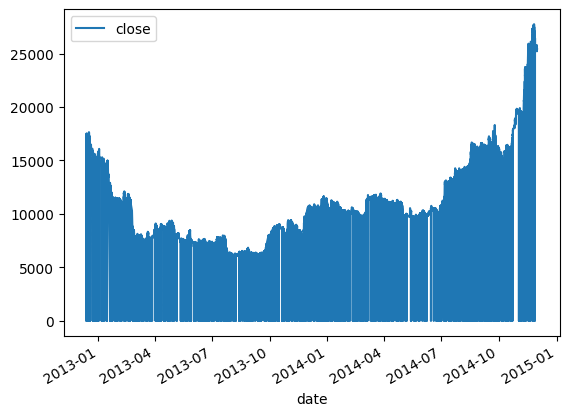

In [215]:
zzc_ail.plot(x='date', y='close', kind='line')

In [216]:
zzc_ail.loc[(zzc_ail['high'] == 0) & (zzc_ail['close'] == 0)]

,date,open,high,low,close
2,2012-12-12 20:59:12.768,17244.228571,0.0,17038.629870,0.0
57,2012-12-17 05:59:24.416,17597.538961,0.0,17540.555844,0.0
222,2012-12-26 16:00:59.392,15049.644156,0.0,14934.284416,0.0
244,2012-12-27 14:00:26.880,15220.179221,0.0,15155.136364,0.0
519,2013-01-14 18:00:14.080,14201.940260,0.0,14137.198701,0.0
692,2013-01-27 02:59:28.384,11432.101299,0.0,11395.192208,0.0
1323,2013-03-06 22:00:10.496,7949.464935,0.0,7903.893506,0.0
1576,2013-03-23 22:00:03.328,7854.857143,0.0,7789.814286,0.0
2187,2013-04-30 13:00:51.072,8794.155844,0.0,8794.155844,0.0
2576,2013-05-23 15:00:42.624,8015.374026,0.0,7980.649351,0.0


In [217]:
zzc_ail, zero_indices = fill_high_with_diffmean(zzc_ail, zzc_ail.loc[(zzc_ail['high'] == 0)].index, ['open','low'],'high')
zzc_ail = fill_moving_average(zzc_ail,zzc_ail.loc[zzc_ail['close']==0].index,'close',8)
b = zzc_ail.loc[zzc_ail['close']==0].copy()
b['close'] = (b['open'] + ((b['high']+b['low'])/2))/2
zzc_ail.loc[zzc_ail['close']==0] = b

In [218]:
dfs =[ail_frx,bk_frx,crp_ail,zzc_ail]

In [219]:
names = ['ail_frx','bk_frx','crp_ail','zzc_ail']

* Plotting the final close values of the stocks

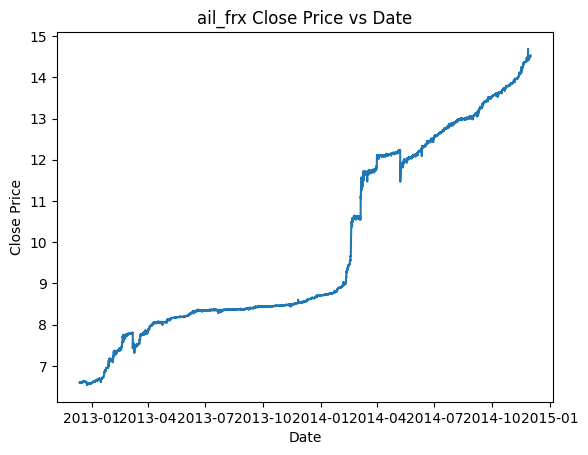

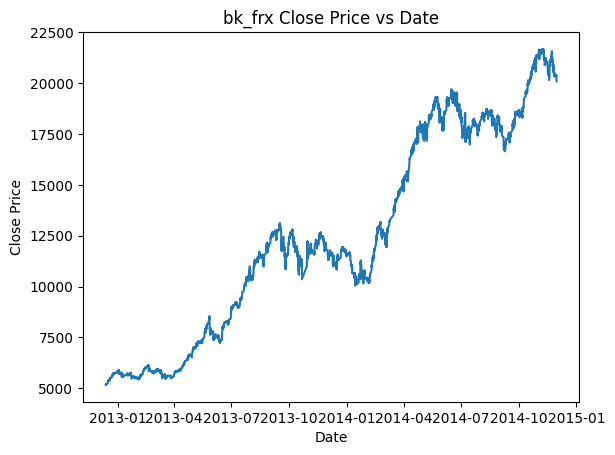

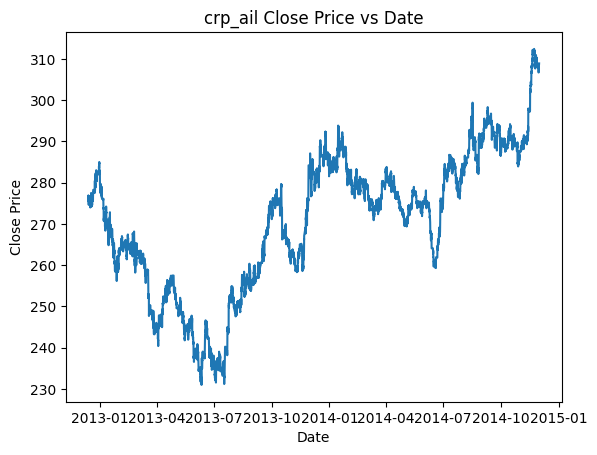

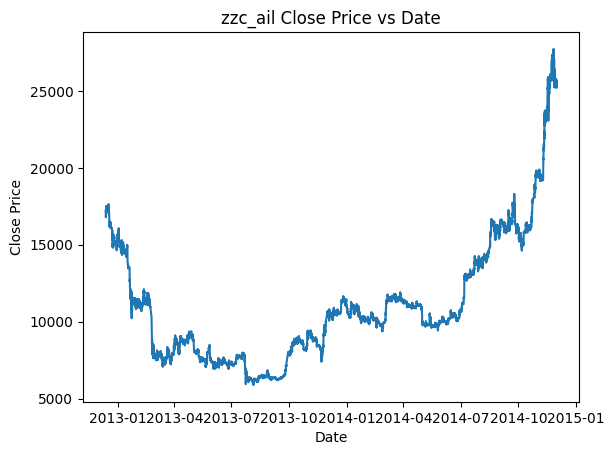

In [220]:
for i in range(len(dfs)):
    df = dfs[i]
    plt.plot(df['date'],df['close'])
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(names[i]+' Close Price vs Date')
    plt.show()

* Save the data so that you can use it in the next steps

In [32]:
## save the data

ail_frx.to_csv("ail_frx_cleaned.csv",index=False)
bk_frx.to_csv("bk_frx_cleaned.csv",index=False)
crp_ail.to_csv("crp_ail_cleaned.csv",index=False)
zzc_ail.to_csv("zzc_ail_cleaned.csv",index=False)

## let's process the data for our RNN Model

* Reading the cleaned data that we've saved earlier.

In [33]:
ail_frx = pd.read_csv("ail_frx_cleaned.csv")
bk_frx = pd.read_csv("bk_frx_cleaned.csv")
crp_ail = pd.read_csv("crp_ail_cleaned.csv")
zzc_ail = pd.read_csv("zzc_ail_cleaned.csv")


In [157]:
def process_data(TRAIN_SIZE=0.8,TIME_STEP=60):

    def normalize_data(data):
        data = data[['date','open','high','low','close']]
        data = data.set_index('date')
        ## Normalizing the data
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        data = scaler.fit_transform(data)

        return data,scaler

    def create_dataset(data, time_step=1):
        X, Y = [], []
        for i in range(len(data)-time_step-1):
            X.append(data[i:(i+time_step), :])
            Y.append(data[i + time_step, :])
        return np.array(X), np.array(Y)    

    def split_data(data, train_size=0.67):
        train_size = int(len(data) * train_size)
        test_size = len(data) - train_size
        train, test = data[0:train_size,:], data[train_size:len(data),:]
        return train, test

    ail_frx_data, ail_frx_scaler = normalize_data(ail_frx)
    bk_frx_data, bk_frx_scaler = normalize_data(bk_frx)
    crp_ail_data, crp_ail_scaler = normalize_data(crp_ail)
    zzc_ail_data, zzc_ail_scaler = normalize_data(zzc_ail)

    ail_frx_train, ail_frx_test = split_data(ail_frx_data, TRAIN_SIZE)
    bk_frx_train, bk_frx_test = split_data(bk_frx_data, TRAIN_SIZE)
    crp_ail_train, crp_ail_test = split_data(crp_ail_data, TRAIN_SIZE)
    zzc_ail_train, zzc_ail_test = split_data(zzc_ail_data, TRAIN_SIZE)

    ail_frx_X_train, ail_frx_Y_train = create_dataset(ail_frx_train, TIME_STEP)
    bk_frx_X_train, bk_frx_Y_train = create_dataset(bk_frx_train, TIME_STEP)

    crp_ail_X_train, crp_ail_Y_train = create_dataset(crp_ail_train, TIME_STEP)
    zzc_ail_X_train, zzc_ail_Y_train = create_dataset(zzc_ail_train, TIME_STEP)

    ail_frx_X_test, ail_frx_Y_test = create_dataset(ail_frx_test, TIME_STEP)
    bk_frx_X_test, bk_frx_Y_test = create_dataset(bk_frx_test, TIME_STEP)

    crp_ail_X_test, crp_ail_Y_test = create_dataset(crp_ail_test, TIME_STEP)
    zzc_ail_X_test, zzc_ail_Y_test = create_dataset(zzc_ail_test, TIME_STEP)

    dictDF = {
        'ail_frx': [ail_frx_X_train, ail_frx_Y_train, ail_frx_X_test, ail_frx_Y_test, ail_frx_scaler],
        'bk_frx': [bk_frx_X_train, bk_frx_Y_train, bk_frx_X_test, bk_frx_Y_test, bk_frx_scaler],
        'crp_ail': [crp_ail_X_train, crp_ail_Y_train, crp_ail_X_test, crp_ail_Y_test, crp_ail_scaler],
        'zzc_ail': [zzc_ail_X_train, zzc_ail_Y_train, zzc_ail_X_test, zzc_ail_Y_test, zzc_ail_scaler]
    }
    return dictDF

In [158]:
TIME_STEP = 45
TRAIN_SIZE = 0.98
RANDOM_SEED = 72

In [178]:
dictDF = process_data(TRAIN_SIZE=TRAIN_SIZE,TIME_STEP=TIME_STEP)

### let's train the LSTM

In [179]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from keras.optimizers import Adam

### Setting the random seed for reproducibility

In [180]:
## set the random seed for reproducibility
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

* We've used stacked GRU Model with 2 layers and 128 units each.
* Added Dropout layers to reduce overfitting. (0.18)
* Used Adam optimizer with learning rate of 0.001
* Used Mean Absolute Error as the loss function.
* Used Early Stopping and Learning Rate Scheduler to prevent overfitting and training time.

In [181]:

def stock_price_prediction_model(X_train, Y_train, X_test, Y_test, num_outputs=1,epochs=100, batch_size=64):
    model = Sequential()   
    model.add((GRU(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
    model.add(Dropout(0.18))

    model.add((GRU(128, activation='relu', return_sequences=False)))
    model.add(Dropout(0.18))
    model.add(Dense(num_outputs, activation='relu'))

    # Optimizer with learning rate scheduling
    optimizer = Adam()  # Specify learning rate here
    optimizer.learning_rate.assign(0.001)
    model.compile(optimizer=optimizer, loss='mae')

    # Adding early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Learning rate scheduler
    def lr_scheduler(epoch, lr):
        if epoch % 10 == 0 and epoch != 0:
            return lr * 0.8
        else:
            return lr

    lr_schedule = LearningRateScheduler(lr_scheduler)

    # Model training
    history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, lr_schedule])

    return model, history


In [182]:
def train_model(X_train, Y_train, X_test, Y_test,epochs=100, batch_size=64):
    model, history = stock_price_prediction_model(X_train, Y_train, X_test, Y_test, num_outputs=4,epochs=epochs, batch_size=batch_size)
    return model    
def evaluate_model(model, X_test, Y_test):
    loss = model.evaluate(X_test, Y_test)
    return loss
def make_predictions(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred
def plot_predictions(y_pred, Y_test):
    plt.plot(y_pred, color='red', label='Predicted Stock Price')
    plt.plot(Y_test, color='blue', label='Real Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
def getPredictions(stock_name):
    X_train, Y_train, X_test, Y_test, scaler = dictDF[stock_name]
    model = train_model(X_train, Y_train, X_test, Y_test,epochs=100, batch_size=64)
    print(evaluate_model(model,X_test, Y_test))
    y_pred = make_predictions(model,X_test)
    y_pred = scaler.inverse_transform(y_pred)
    Y_test = scaler.inverse_transform(Y_test)
    dictDF[stock_name].append(y_pred)
    dictDF[stock_name].append(Y_test)
    dictDF[stock_name].append(model)


Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.2102 - val_loss: 0.0178 - learning_rate: 0.0010
Epoch 2/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0348 - val_loss: 0.0233 - learning_rate: 0.0010
Epoch 3/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0282 - val_loss: 0.0144 - learning_rate: 0.0010
Epoch 4/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0232 - val_loss: 0.0305 - learning_rate: 0.0010
Epoch 5/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0207 - val_loss: 0.0243 - learning_rate: 0.0010
Epoch 6/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0198 - val_loss: 0.0044 - learning_rate: 0.0010
Epoch 7/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0189 - val_loss: 0.0151 - learning_rate: 0.0010
Epoch 8/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0170 - val_loss: 0.0122 - learning_rate: 0.0010
Epoch 9/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0167 - val_loss: 0.0056 - learning_rate: 0.0010
Epoc

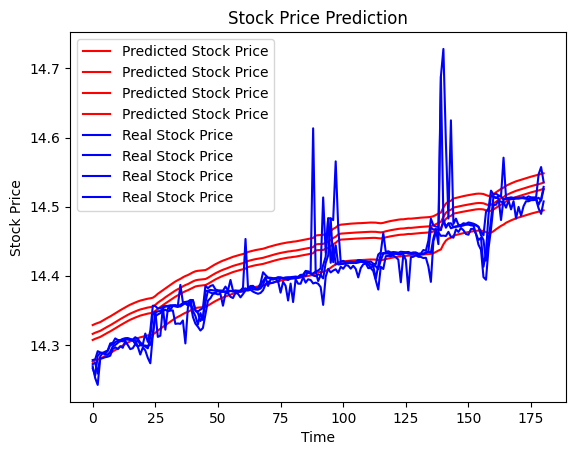

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0036 
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.1695 - val_loss: 0.0257 - learning_rate: 0.0010
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0394 - val_loss: 0.0108 - learning_rate: 0.0010
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0331 - val_loss: 0.0048 - learning_rate: 0.0010
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0321 - val_loss: 0.0086 - learning_rate: 0.0010
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0287 - val_loss: 0.0410 - learning_rate: 0.0010
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0304 - val_loss: 0.0164 - learning_rate: 0.0010
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0276 - val_loss: 0.0277 - learning_rate: 0.0010
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0270 - val_loss: 0.0213 - learning_rate: 0.0010
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0270 - val_loss: 0.0053 - learning_rate: 0.0010
Epoch 10/100
75/75 ━━━

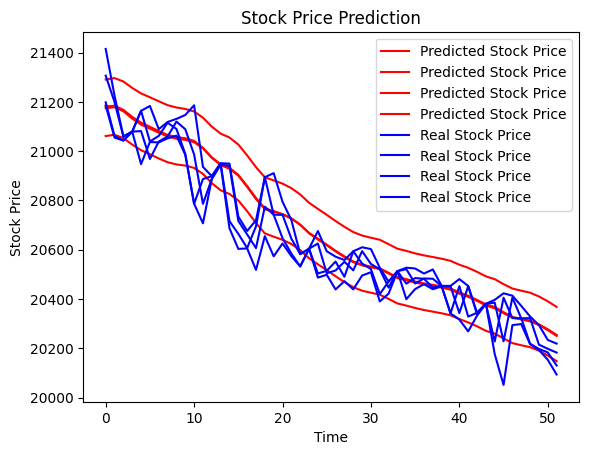

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0048
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


169/169 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.1274 - val_loss: 0.0138 - learning_rate: 0.0010
Epoch 2/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0355 - val_loss: 0.0165 - learning_rate: 0.0010
Epoch 3/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0296 - val_loss: 0.0211 - learning_rate: 0.0010
Epoch 4/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0258 - val_loss: 0.0104 - learning_rate: 0.0010
Epoch 5/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0241 - val_loss: 0.0247 - learning_rate: 0.0010
Epoch 6/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0224 - val_loss: 0.0361 - learning_rate: 0.0010
Epoch 7/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0210 - val_loss: 0.0074 - learning_rate: 0.0010
Epoch 8/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0196 - val_loss: 0.0296 - learning_rate: 0.0010
Epoch 9/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0192 - val_loss: 0.0313 - learning_rate: 0.0010
Epoc

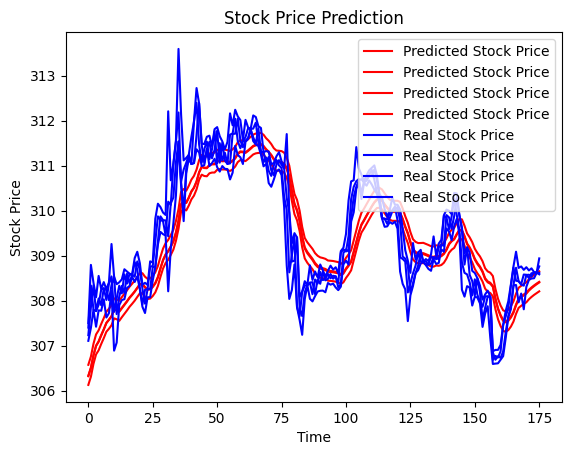

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0073 
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0721 - val_loss: 0.0163 - learning_rate: 0.0010
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0174 - val_loss: 0.0208 - learning_rate: 0.0010
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0147 - val_loss: 0.0260 - learning_rate: 0.0010
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0143 - val_loss: 0.0317 - learning_rate: 0.0010
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0125 - val_loss: 0.0245 - learning_rate: 0.0010
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0117 - val_loss: 0.0228 - learning_rate: 0.0010
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0118 - val_loss: 0.0144 - learning_rate: 0.0010
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0113 - val_loss: 0.0418 - learning_rate: 0.0010
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0111 - val_loss: 0.0153 - learning_rate: 0.0010
Epoc

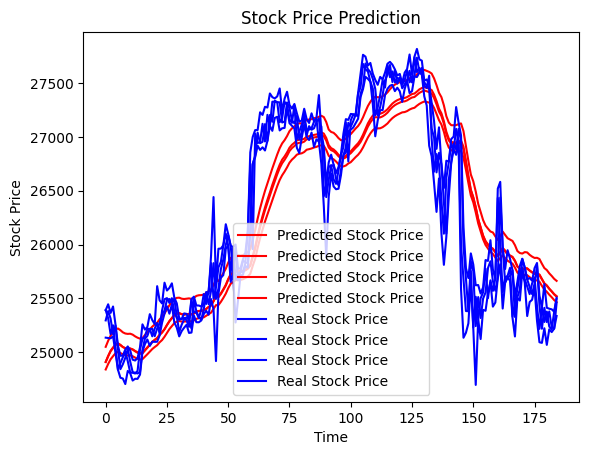

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0121


In [183]:
## train and predict for all stocks
for stock in dictDF.keys():
    getPredictions(stock)
    plot_predictions(dictDF[stock][5], dictDF[stock][6])
    evaluate_model(dictDF[stock][7], dictDF[stock][2], dictDF[stock][3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Day 1 : [[0.9416107  0.9446415  0.9361427  0.94220036]]
y_pred Shape :  (1, 4)
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Day 2 : [[0.940549   0.94341844 0.9349051  0.94100314]]
y_pred Shape :  (1, 4)
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Day 3 : [[0.939978  0.9426551 0.9341755 0.9403264]]
y_pred Shape :  (1, 4)
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Day 4 : [[0.9394771  0.94200855 0.933564   0.93976325]]
y_pred Shape :  (1, 4)
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Day 5 : [[0.938962  0.9413964 0.9329749 0.9392143]]
y_pred Shape :  (1, 4)
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Day 6 : [[0.9384253  0.94079703 0.9323883  0.9386603 ]]
y_pred Shape :  (1, 4)
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Day 7 : [[0.9378723  0.94020367 0.93180144 0.9380995 ]]
y_pred Shape :  (1, 4)
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Day 8 : [[0.93730843 0.9396135  0.9312145  0.9375338 ]]
y

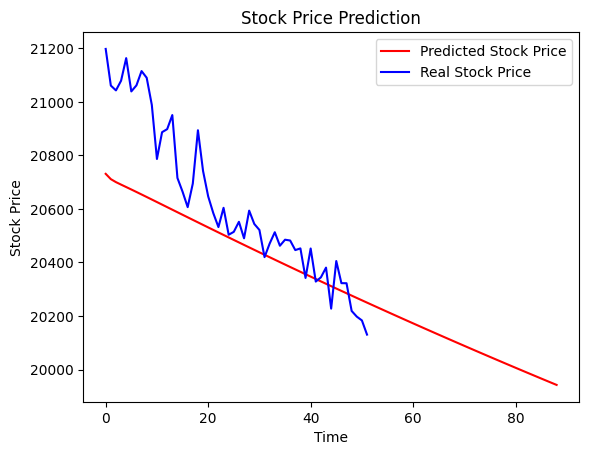

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Day 1 : [[0.84490263 0.8353017  0.84972334 0.84537226]]
y_pred Shape :  (1, 4)
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Day 2 : [[0.84366703 0.83365136 0.84805524 0.8440766 ]]
y_pred Shape :  (1, 4)
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted Day 3 : [[0.84264493 0.83250046 0.84683704 0.8430425 ]]
y_pred Shape :  (1, 4)
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted Day 4 : [[0.8428122  0.8326557  0.8469511  0.84321135]]
y_pred Shape :  (1, 4)
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Day 5 : [[0.843138   0.8329687  0.84723675 0.8435368 ]]
y_pred Shape :  (1, 4)
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted Day 6 : [[0.8434191 0.8332377 0.8474872 0.8438208]]
y_pred Shape :  (1, 4)
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Day 7 : [[0.84372246 0.8335347  0.8477725  0.8441294 ]]
y_pred Shape :  (1, 4)
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Day 8 : [[0.844064   0.8338727  0.8481041  0.84447664

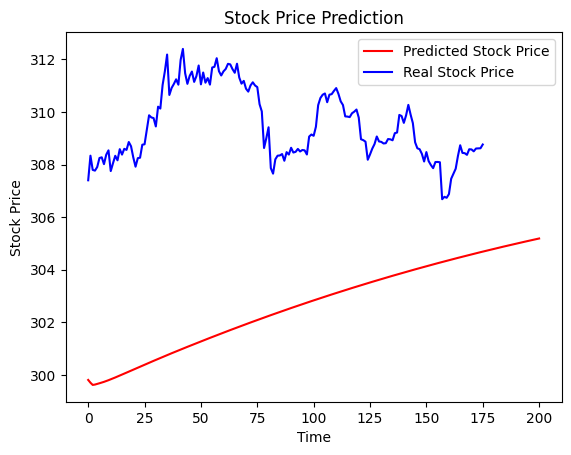

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Day 1 : [[0.95998716 0.93915427 0.9566735  0.9423056 ]]
y_pred Shape :  (1, 4)
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Day 2 : [[0.96055555 0.93972313 0.9572563  0.94286674]]
y_pred Shape :  (1, 4)
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Day 3 : [[0.96113956 0.94030106 0.95784736 0.94344145]]
y_pred Shape :  (1, 4)
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Day 4 : [[0.96171415 0.94086874 0.95842737 0.9440067 ]]
y_pred Shape :  (1, 4)
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Day 5 : [[0.9622835  0.94143033 0.9590012  0.944566  ]]
y_pred Shape :  (1, 4)
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Day 6 : [[0.962852  0.9419906 0.9595736 0.9451246]]
y_pred Shape :  (1, 4)
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Day 7 : [[0.9634193  0.9425491  0.9601442  0.94568175]]
y_pred Shape :  (1, 4)
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Day 8 : [[0.9639853  0.94310594 0.96071285 0.9462372 

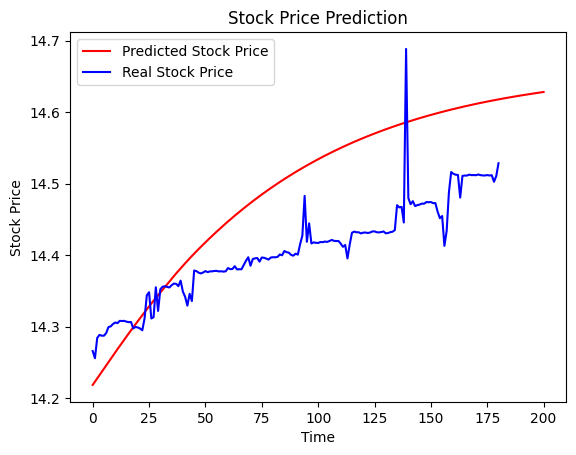

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Day 1 : [[0.8513682  0.8417032  0.85071194 0.841216  ]]
y_pred Shape :  (1, 4)
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Day 2 : [[0.8514987  0.84194803 0.8510763  0.84172195]]
y_pred Shape :  (1, 4)
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Day 3 : [[0.85174435 0.84221816 0.85142237 0.8422541 ]]
y_pred Shape :  (1, 4)
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Day 4 : [[0.85222256 0.84265924 0.8519279  0.842864  ]]
y_pred Shape :  (1, 4)
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Day 5 : [[0.85277116 0.8431647  0.85248804 0.8434895 ]]
y_pred Shape :  (1, 4)
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Day 6 : [[0.85333514 0.8436973  0.85306185 0.8441152 ]]
y_pred Shape :  (1, 4)
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Day 7 : [[0.8539176  0.84425354 0.8536501  0.8447482 ]]
y_pred Shape :  (1, 4)
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Day 8 : [[0.85451627 0.8448298  0.8542515  0.8453

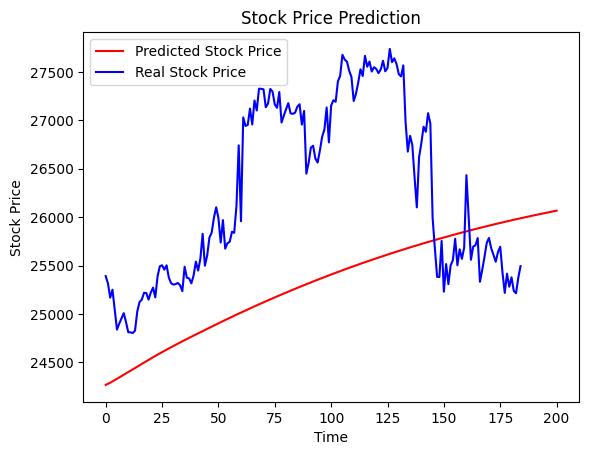

In [184]:
## we have to predict the next 90 days stock prices for bk_frx using rolling window approach
## we will use the last 30 days data to predict the next day stock price and then use the predicted value to predict the next day stock price and so on
def predict_next_day_stock_pricey(stock_name, num_days=90):
    X_train, Y_train, X_test, Y_test, scaler = dictDF[stock_name][0], dictDF[stock_name][1], dictDF[stock_name][2], dictDF[stock_name][3], dictDF[stock_name][4]
    model = dictDF[stock_name][-1]
    data = dictDF[stock_name][0]
    data = data[-1]
    data = np.array(data)
    predictions = []
    for i in range(num_days):
        data = data.reshape(1, data.shape[0], data.shape[1])
        y_pred = model.predict(data)
        data = np.vstack((data[0][1:], y_pred))
        predictions.append(y_pred)
        print("Predicted Day {} : {}".format(i+1, y_pred))
        print("y_pred Shape : ", y_pred.shape)
        print(i)

    predictions = np.array(predictions)
    predictions = predictions.reshape(predictions.shape[0], predictions.shape[2])
    print("Predictions : ", predictions.shape)

    predictions = scaler.inverse_transform(predictions)
    return predictions

PREDICT_SIZE = [89, 201, 201, 201]

names = ['bk_frx', 'crp_ail', 'ail_frx', 'zzc_ail']

for i in range(len(names)):
    key = names[i]
    preds = predict_next_day_stock_pricey(key, PREDICT_SIZE[i]).reshape(PREDICT_SIZE[i], 4)
    plt.plot(preds[:, 3], color='red', label='Predicted Stock Price')
    plt.plot(dictDF[key][6][:, 3][:PREDICT_SIZE[i]], color='blue', label='Real Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

## Saving the Submission

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Day 1 : [[0.91282415 0.91520655 0.9070245  0.9133562 ]]
y_pred Shape :  (1, 4)
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Day 2 : [[0.91216016 0.9144986  0.90628564 0.9126236 ]]
y_pred Shape :  (1, 4)
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Day 3 : [[0.91166365 0.9139395  0.9057168  0.912065  ]]
y_pred Shape :  (1, 4)
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Day 4 : [[0.91118646 0.9134119  0.9051875  0.9115462 ]]
y_pred Shape :  (1, 4)
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Day 5 : [[0.9107001  0.9128908  0.9046663  0.91103405]]
y_pred Shape :  (1, 4)
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Day 6 : [[0.9102037 0.9123708 0.9041468 0.9105219]]
y_pred Shape :  (1, 4)
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Day 7 : [[0.9097004 0.9118517 0.9036283 0.9100093]]
y_pred Shape :  (1, 4)
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Day 8 : [[0.9091928  0.91133285 0.9031104  0.90949637]]
y

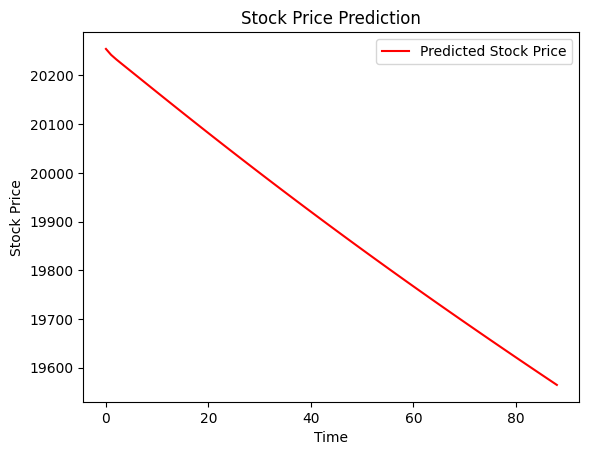

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted Day 1 : [[0.95098484 0.93979573 0.95558536 0.9511332 ]]
y_pred Shape :  (1, 4)
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted Day 2 : [[0.9508685  0.9396622  0.9554441  0.95101833]]
y_pred Shape :  (1, 4)
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted Day 3 : [[0.95076585 0.93955594 0.9553307  0.9509199 ]]
y_pred Shape :  (1, 4)
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted Day 4 : [[0.9507239  0.9395173  0.95528615 0.950882  ]]
y_pred Shape :  (1, 4)
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted Day 5 : [[0.9506955  0.93949187 0.955256   0.950857  ]]
y_pred Shape :  (1, 4)
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted Day 6 : [[0.95067275 0.93947136 0.95523226 0.9508374 ]]
y_pred Shape :  (1, 4)
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Day 7 : [[0.9506557  0.93945706 0.9552152  0.95082325]]
y_pred Shape :  (1, 4)
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted Day 8 : [[0.9506453 0.9394489 0.9552053 0.9508155

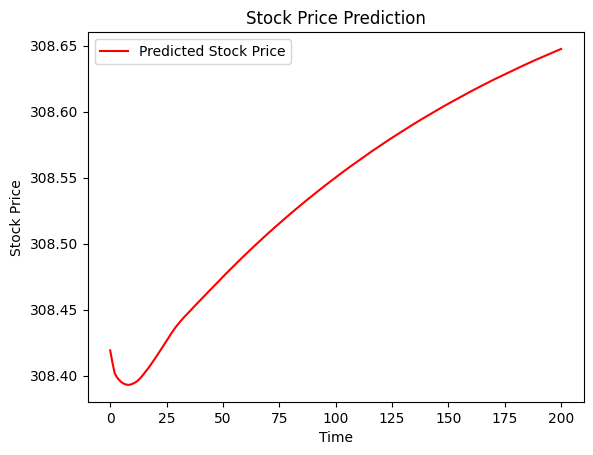

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Day 1 : [[0.9995967 0.9779794 0.9963188 0.9811149]]
y_pred Shape :  (1, 4)
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Day 2 : [[0.9997698  0.97815335 0.9964961  0.98128515]]
y_pred Shape :  (1, 4)
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Day 3 : [[0.9999472  0.9783331  0.99667966 0.9814604 ]]
y_pred Shape :  (1, 4)
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Day 4 : [[1.0001171 0.9785043 0.9968548 0.9816279]]
y_pred Shape :  (1, 4)
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Day 5 : [[1.0002897 0.978678  0.9970312 0.9817983]]
y_pred Shape :  (1, 4)
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Day 6 : [[1.0004435  0.9788312  0.99718803 0.98194826]]
y_pred Shape :  (1, 4)
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Day 7 : [[1.0006065  0.9789939  0.99735385 0.9821085 ]]
y_pred Shape :  (1, 4)
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Day 8 : [[1.0007776  0.9791633  0.9975266  0.98227626]]
y_pre

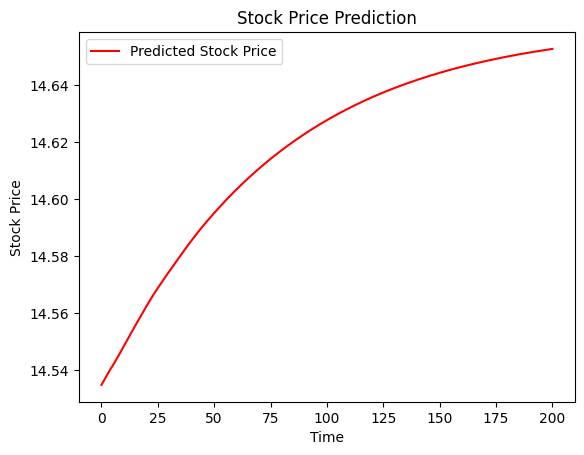

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Day 1 : [[0.90518314 0.89494944 0.9046181  0.8961011 ]]
y_pred Shape :  (1, 4)
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Day 2 : [[0.9058367  0.89546347 0.9051447  0.8965472 ]]
y_pred Shape :  (1, 4)
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Day 3 : [[0.9063803  0.89597476 0.90563816 0.89690626]]
y_pred Shape :  (1, 4)
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Day 4 : [[0.90678537 0.8963971  0.906027   0.8972177 ]]
y_pred Shape :  (1, 4)
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Day 5 : [[0.90716887 0.8967967  0.90639555 0.897534  ]]
y_pred Shape :  (1, 4)
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Day 6 : [[0.9075613  0.8971983  0.90677315 0.8978701 ]]
y_pred Shape :  (1, 4)
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Day 7 : [[0.9079616  0.89760697 0.9071611  0.8982242 ]]
y_pred Shape :  (1, 4)
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Day 8 : [[0.90837145 0.89800525 0.907548   0.8985

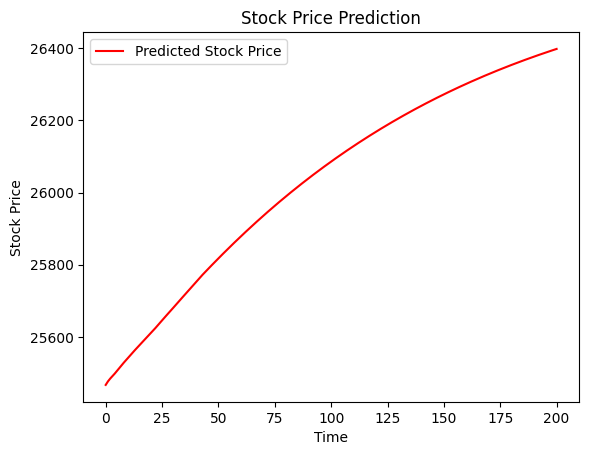

In [185]:
submissions = pd.read_csv("sampleSubmission.csv")
submissions['date'] = pd.to_datetime(submissions['date'], unit='ms')
submissions = submissions.set_index('date')
submissions = submissions[['open','high','low','close']]


def predict_next_day_stock_price(stock_name, num_days=90):
    X_train, Y_train, X_test, Y_test, scaler = dictDF[stock_name][0], dictDF[stock_name][1], dictDF[stock_name][2], dictDF[stock_name][3], dictDF[stock_name][4]
    model = dictDF[stock_name][-1]
    data = dictDF[stock_name][2]
    data = data[-1]
    data = np.array(data)
    predictions = []
    for i in range(num_days):
        data = data.reshape(1, data.shape[0], data.shape[1])
        y_pred = model.predict(data)
        data = np.vstack((data[0][1:], y_pred))
        predictions.append(y_pred)
        print("Predicted Day {} : {}".format(i+1, y_pred))
        print("y_pred Shape : ", y_pred.shape)
        print(i)

    predictions = np.array(predictions)
    predictions = predictions.reshape(predictions.shape[0], predictions.shape[2])
    print("Predictions : ", predictions.shape)

    predictions = scaler.inverse_transform(predictions)
    return predictions


PREDICT_SIZE = [89, 201, 201, 201]

names = ['bk_frx', 'crp_ail', 'ail_frx', 'zzc_ail']

final_results =[]

for i in range(len(names)):
    key = names[i]
    preds = predict_next_day_stock_price(key, PREDICT_SIZE[i]).reshape(PREDICT_SIZE[i], 4)
    plt.plot(preds[:, 3], color='red', label='Predicted Stock Price')
    plt.title(names[i]+' Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
    final_results.extend(preds)

submit_csv = pd.DataFrame(final_results, columns=['open','high','low','close'])

Dates = pd.read_csv("sampleSubmission.csv")
Dates = Dates['date']

submit_csv['date'] = Dates

submit_csv = submit_csv[['date','open','high','low','close']]

submit_csv['ID'] = submit_csv.index + 1

submit_csv = submit_csv[['ID','date','open','high','low','close']]

In [186]:
fileName = "submit128GRUx2_DROP18PER"+str(TRAIN_SIZE)+"DAY"+str(TIME_STEP)+"RS"+str(RANDOM_SEED)+".csv"

In [187]:
submit_csv.to_csv(fileName,float_format='%.10f', index=False)

## Let's Save the Model

In [188]:
## save the model
dictDF['ail_frx'][-1].save("ail_frx_model.keras")
dictDF['bk_frx'][-1].save("bk_frx_model.keras")
dictDF['crp_ail'][-1].save("crp_ail_model.keras")
dictDF['zzc_ail'][-1].save("zzc_ail_model.keras")